# EDA - Exploratory Data Analysis

**BUSINESS PROBLEM**

1. What is the best selling price for each pants model?
2. How many types of pants and colors does H&M?
3. What are the necessary raw materials for making these pants the comparing with the main competitor?

## 0.0. Imports

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import functions_db as fdb

from matplotlib            import pyplot as plt


## 0.1. Data Collection

In [9]:
#connection
connection = fdb.database_conetion( 'database_hm', '/webscraping_hm/database')

#query
select_all = "SELECT * FROM SHOWCASE_HM"

res = fdb.get_data(connection, select_all)


columns_name=['product_id', 'product_name', 'product_department', 'product_category', 'product_fit',            
 'product_model', 'product_price', 'product_pieces', 'price_per_pieces', 'color_name', 'cotton_sheel',
 'elastomultiester_sheel', 'lyocell_sheel', 'polyester_sheel', 'rayon_sheel', 'spandex_sheel',
 'cotton_pck_lining', 'polyester_pck_lining', 'size_number_cm', 'size_model', 'start_scrapy', 'end_scrapy']

df_raw = pd.DataFrame(res, columns=columns_name)
df_raw.sample(5)

Connection done on database_hm 
Select Done


,product_id,product_name,product_department,product_category,product_fit,product_model,product_price,product_pieces,price_per_pieces,color_name,...,lyocell_sheel,polyester_sheel,rayon_sheel,spandex_sheel,cotton_pck_lining,polyester_pck_lining,size_number_cm,size_model,start_scrapy,end_scrapy
222,0811993048,regular_jeans,men,jeans,regular,regular,34.99,1,34.99,dark_blue,...,0.0,0.0,0.0,0.02,0.35,0.65,180,33/32,2023-02-18 13:30:02,2023-02-18 13:31:48
228,0875105037,relaxed_jeans,men,jeans,relaxed,relaxed,39.99,1,39.99,black,...,0.0,0.0,0.0,0.00,0.35,0.65,187,31/32,2023-02-18 13:30:02,2023-02-18 13:31:48
67,1114023003,loose_jeans,men,jeans,loose,loose,44.99,1,44.99,cream,...,0.0,0.0,0.0,0.00,0.35,0.65,183,31/32,2023-02-18 05:28:27,2023-02-18 05:30:58
80,0979945031,loose_jeans,men,jeans,loose,loose,39.99,1,39.99,white,...,0.0,0.0,0.0,0.00,1.00,0.00,180,38/32,2023-02-18 05:28:27,2023-02-18 05:30:58
14,1119482005,loose_jeans,men,jeans,loose,loose,44.99,1,44.99,dark_denim_blue,...,0.0,0.0,0.0,0.00,0.35,0.65,188,31/32,2023-02-18 05:28:27,2023-02-18 05:30:58


# 1.0. Data Description

In [38]:
df1 = df_raw.copy()

## 1.0. Data Dimension

In [39]:
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Columns: {df1.shape[1]}')
print(f'')

Number of Rows: 274
Number of Columns: 22



## 1.2. Data Types

In [40]:
df1.dtypes

product_id                 object
product_name               object
product_department         object
product_category           object
product_fit                object
product_model              object
product_price             float64
product_pieces              int64
price_per_pieces          float64
color_name                 object
cotton_sheel              float64
elastomultiester_sheel    float64
lyocell_sheel             float64
polyester_sheel           float64
rayon_sheel               float64
spandex_sheel             float64
cotton_pck_lining         float64
polyester_pck_lining      float64
size_number_cm             object
size_model                 object
start_scrapy               object
end_scrapy                 object
dtype: object

In [42]:
#convert object to datetime
df1['end_scrapy']   = pd.to_datetime( df1['end_scrapy'] )
df1['start_scrapy'] = pd.to_datetime( df1['start_scrapy'] )
df1.dtypes

product_id                        object
product_name                      object
product_department                object
product_category                  object
product_fit                       object
product_model                     object
product_price                    float64
product_pieces                     int64
price_per_pieces                 float64
color_name                        object
cotton_sheel                     float64
elastomultiester_sheel           float64
lyocell_sheel                    float64
polyester_sheel                  float64
rayon_sheel                      float64
spandex_sheel                    float64
cotton_pck_lining                float64
polyester_pck_lining             float64
size_number_cm                    object
size_model                        object
start_scrapy              datetime64[ns]
end_scrapy                datetime64[ns]
dtype: object

## 1.3 Identification of Missing Data (NaN)

It was verified that the dataset without size is always the same and has been 33 product_id. In addition, it was analyzed on the product pages and identified that the information was not really found.

In [17]:
df1.isnull().sum()

product_id                 0
product_name               0
product_department         0
product_category           0
product_fit                0
product_model              0
product_price              0
product_pieces             0
price_per_pieces           0
color_name                 0
cotton_sheel               0
elastomultiester_sheel     0
lyocell_sheel              0
polyester_sheel            0
rayon_sheel                0
spandex_sheel              0
cotton_pck_lining          0
polyester_pck_lining       0
size_number_cm            66
size_model                66
start_scrapy               0
end_scrapy                 0
dtype: int64

In [30]:
df1['product_id'][df1['size_model'].isnull()].unique()

array(['0979945003', '1008110002', '1130309002', '1130139003',
       '1024256004', '0985159007', '1153385002', '1008549005',
       '0979945028', '0938875007', '1096385002', '0979945023',
       '1100162004', '1013317002', '1004199002', '1024256002',
       '0690449064', '1132148001', '1107750002', '1004199007',
       '0985197004', '0875105023', '0985197006', '0985197003',
       '0993887007', '1107750001', '0811993039', '0971061006',
       '0938875012', '0985197007', '1051644001', '1025726003',
       '1027852002'], dtype=object)

In [60]:
aux = (df1.isna().sum() / df1.shape[0])
print(f'Percentage of Missing data in size_number_cm: {round(aux[aux > 0] * 100, 2)[0]}%')
print(f'Percentage of Missing data in size_model: {round(aux[aux > 0] * 100, 2)[1]}%')

Percentage of Missing data in size_number_cm: 24.09%
Percentage of Missing data in size_model: 24.09%


## 1.4 Replacement of Missing Data

The missing variables are approximately 1/4 of the data. With that, decide not to use these variables now. But in the next step of improving the data, I will see the possibility of filling this data to take advantage of these columns.

In [64]:
df1 = df1.drop( columns=[ 'size_number_cm', 'size_model' ] ).dropna()
df1.shape

(274, 20)

## 1.5. Descriptive Statistics

In [112]:
#numerical attributes
num_attr = df1.select_dtypes( include = ['int64', 'float64' ] )

#categorical attributes
cat_attr = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64[ns]' ] )

### 1.5.1 Numeric Attributes

In [113]:
# Measures of central tendency (mean and median)
t1 = pd.DataFrame( num_attr.apply( np.mean ) ).T
t2 = pd.DataFrame( num_attr.apply( np.median ) ).T

# Dispersion measure - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attr.apply( np.std ) ).T
d2 = pd.DataFrame( num_attr.apply( np.min ) ).T
d3 = pd.DataFrame( num_attr.apply( np.max ) ).T
d4 = pd.DataFrame( num_attr.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attr.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attr.apply( lambda x: x.kurtosis() ) ).T

#concat
m1 = pd.concat( [ d2, d3, d4, t1, t2, d1, d5, d6 ] ).T.reset_index()
m1.columns = [ 'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m1

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,product_price,19.99,49.99,30.00,36.869562,39.99,7.655213,-0.435474,-0.522591
1,product_pieces,1.00,2.00,1.00,1.014599,1.00,0.119939,8.138745,64.711481
2,price_per_pieces,19.99,49.99,30.00,36.504672,39.99,7.616727,-0.428138,-0.611673
3,cotton_sheel,0.30,1.00,0.70,0.965839,0.99,0.080447,-4.962519,33.740997
4,elastomultiester_sheel,0.00,0.09,0.09,0.004234,0.00,0.018273,4.121969,15.172505
5,lyocell_sheel,0.00,0.55,0.55,0.004015,0.00,0.046818,11.639974,134.470507
6,polyester_sheel,0.00,0.21,0.21,0.013321,0.00,0.050279,3.535447,10.603012
7,rayon_sheel,0.00,0.15,0.15,0.004015,0.00,0.021048,5.317257,27.873723
8,spandex_sheel,0.00,0.02,0.02,0.008577,0.01,0.007435,0.236294,-1.165132
9,cotton_pck_lining,0.00,1.00,1.00,0.439927,0.35,0.338281,0.719075,-0.718131


### 1.5.2 Categorical Attributes

In [114]:
cat_attr.apply( lambda x: x.unique().shape[0])

product_id            140
product_name           22
product_department      1
product_category        2
product_fit             5
product_model           8
color_name             29
dtype: int64

<AxesSubplot: xlabel='product_fit', ylabel='price_per_pieces'>

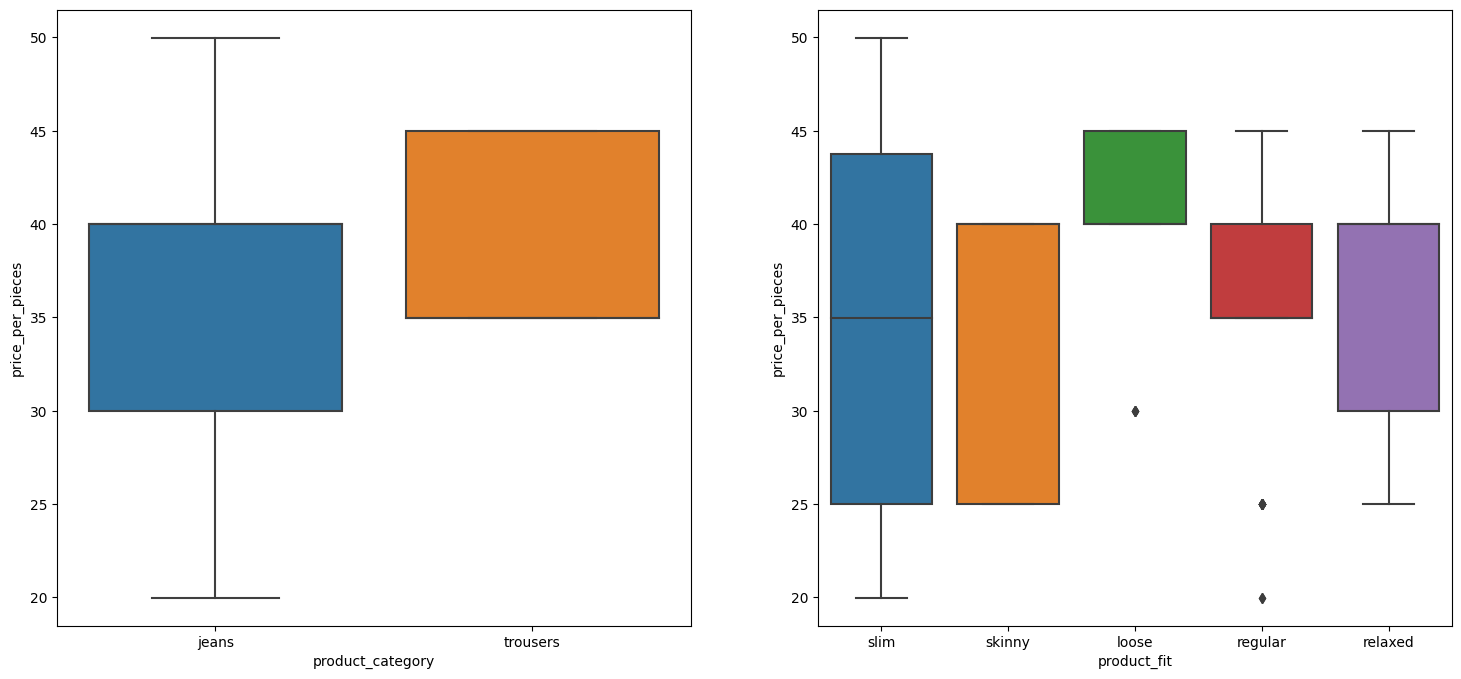

In [146]:
plt.figure(figsize=(18,8))
plt.subplot( 1, 2, 1 )
sns.boxplot( x='product_category', y='price_per_pieces', data=df1 )

plt.subplot( 1, 2, 2 )
sns.boxplot( x='product_fit', y='price_per_pieces', data=df1 )


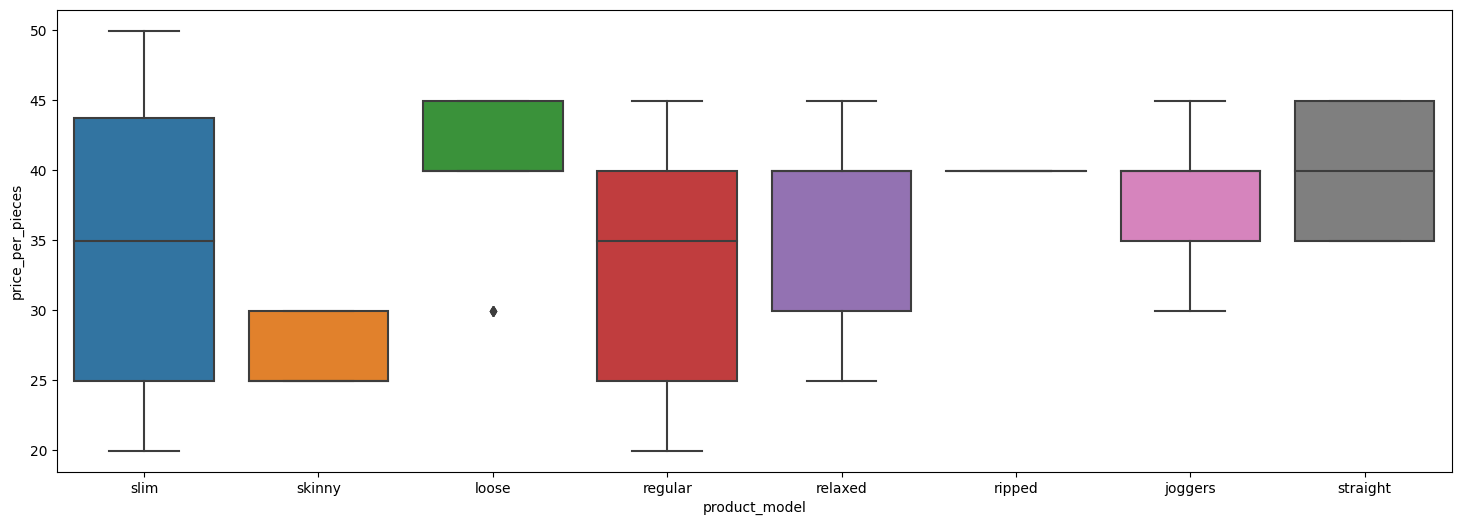

In [150]:
plt.figure(figsize=(18,6))
sns.boxplot( x='product_model', y='price_per_pieces', data=df1 );

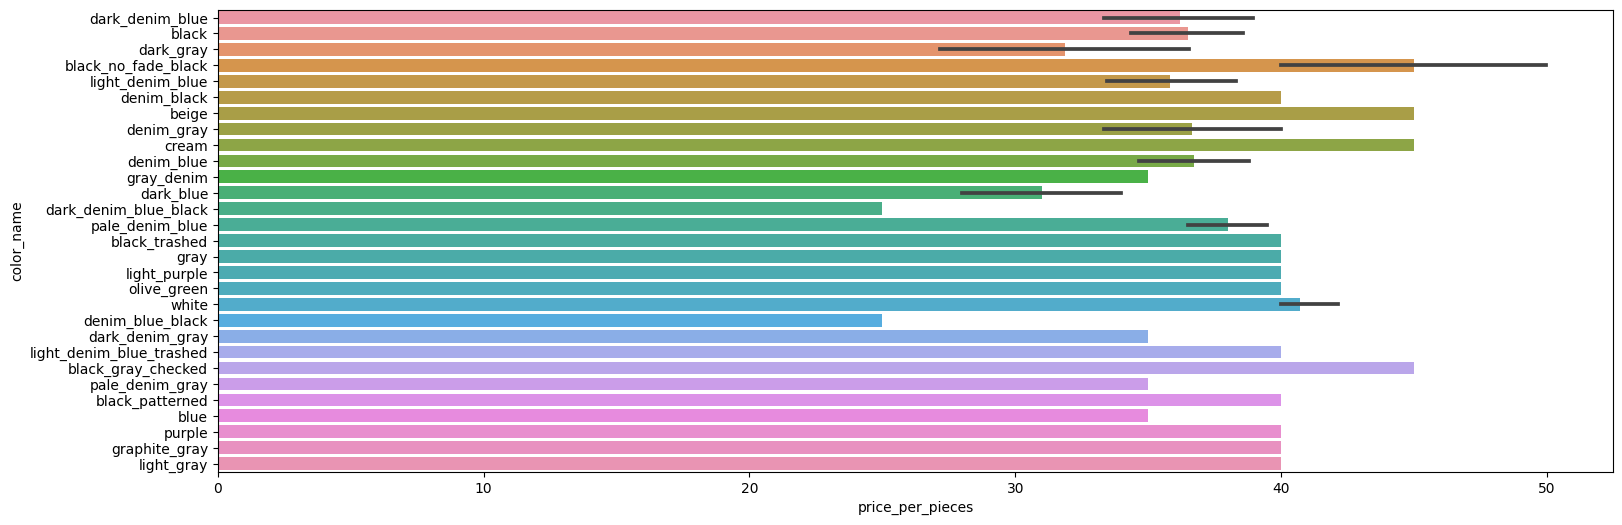

In [166]:
#aux = df1[(df1['color_name'].sum() >= 10) ]
plt.figure(figsize=(18,6))
sns.barplot( x='price_per_pieces', y='color_name', data=df1 );

# 2.0. Hypothesis (In progress)

## 2.1. Slim and skinny fit jeans are more popular than loose and relaxed fit jeans.

## 2.2. The most popular category of men's pants is jeans, with trousers being less popular.


## 2.3. Dark colours are the most popular for jeans, while light colours are more popular for trousers.


## 2.4. Men's jeans with unique compositions, are cheaper than products with more than one.

## 2.5. The pricing strategy of the competitor for men's jeans is based on the product fit, with slim and skinny fit jeans being more expensive compared to loose and regular fit ## jeans.

## 2.6. The pricing strategy of the competitor for trousers is based on the material quality and brand reputation, with higher-quality materials and well-known brands commanding higher prices.

## 2.7. The competitor offers a wider range of colours for men's jeans compared to trousers.

## 2.8. The competitor's pricing strategy for straight-fit jeans is based on material quality, with high-quality materials commanding higher prices compared to lower-quality materials.

## 2.9. More than 50% of products use cotton.

## 2.10 Products that use spandex are more expensive.